In [5]:
%load_ext autoreload
%autoreload 2
import sigcom
from sigcom.coding.atsc import pck_long
from scipy.sparse import coo_matrix, csc_matrix, csr_matrix
import numpy as np
from numba import njit

In [6]:
code = pck_long.get_pck([8,15])

In [7]:
CR = code['code_rate_id']
K = int(code['N_ldpc']*CR[0]/CR[1])
(64800-K)/360
len(code['pck'])

96

In [8]:
row = [0, 2, 1, 0, 2]
col = [0, 0, 1, 2, 2]
data = [-1,1,2,3,4]
coo_matrix((data, (row,col)),shape=(3,3)).toarray()

array([[-1,  0,  3],
       [ 0,  2,  0],
       [ 1,  0,  4]])

In [20]:
def pck_to_sparse_rows_and_cols(pck, N, K, nCyclicFactor = 360):
    '''
    Take the definition of the parity check matrix from DVB or ATSC 
    and translate them to a list representation of all edges
    Call 'H = coo_matrix((np.ones(len(rows)),(rows,cols)),shape=(N-K,N))'
    afterwards to get a sparse matrix representation.
    '''
    nLayers = int((N-K)/nCyclicFactor)
    rows = []
    cols = []
    col = 0
    for row in pck:
        for m in range(nCyclicFactor):
            for p in row:
                idx = (p+m*nLayers) % (N-K)
                rows.append(idx)
                cols.append(col)
            col+=1
    for k in range(N-K-1):
        rows.extend([k, k+1])
        cols.extend([col, col])
        col += 1
    rows.append(N-K-1)
    cols.append(col)
    return rows, cols

N = 64800
rows, cols = pck_to_sparse_rows_and_cols(code['pck'], N, K)
H = csc_matrix((np.ones(len(rows)),(rows,cols)),shape=(N-K,N))

In [121]:
%%timeit
H = coo_matrix((np.ones(len(rows)),(rows,cols)),shape=(N-K,N))

39.8 ms ± 4.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [125]:
%%timeit
H = csr_matrix((np.ones(len(rows)),(rows,cols)),shape=(N-K,N))

85.2 ms ± 5.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches((20,10))
plt.spy(H,markersize=0.1)
plt.show()

NameError: name 'H' is not defined

In [69]:
K/360

96.0

In [3]:
l=[[0,1],[1,2,3]]

In [8]:
np.array(l,dtype=np.int32)


ValueError: setting an array element with a sequence.

In [47]:
import numba as nb
@njit
def test(p):
    S=0
    for i in range(len(p)):
        for j in range(len(p[i])):
            S += p[i][j]
    return S
p = np.asarray([[1,2],[3,4,5]])
nb.typeof(p)

ValueError: Unsupported array dtype: object

In [36]:
%%cython
cdef fuc():
    cdef int a = 0
    for i in range(10):
        a += i

In [1]:
%load_ext Cython

In [2]:
%%cython

cdef int a = 0
for i in range(10):
    a += i
print(a)

DistutilsPlatformError: Unable to find vcvarsall.bat

In [1]:
%load_ext Cython
import os
os.environ['DISTUTILS_USE_SDK']='1'
os.environ['MSSKdK']='1'

In [2]:
%%cython

def geo_prog_cython(double alpha, int n):
    cdef double current = 1.0
    cdef double sum = current
    cdef int i
    for i in range(n):
        current = current * alpha
        sum = sum + current
    return sum

In [7]:
%%cython 
def fib(n):
    cdef int s=0
    for i in range(n):
        s+=n
    return s

In [8]:
fib(10)

100

In [87]:
len(np.hstack((pck[0],pck[0])))
len(pck[1])

19

In [88]:
a=np.array([1,2,3])
b=np.array([1,2,3])
np.vstack((a,b))

array([[1, 2, 3],
       [1, 2, 3]])

In [108]:
l=[]
l.extend([1,2])
l

[1, 2]

In [1]:
from sigcom.coding.util import *

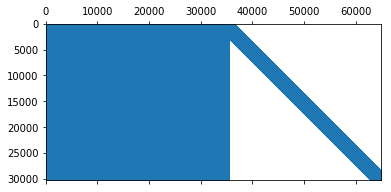

In [133]:
plt.spy(H)
plt.show()

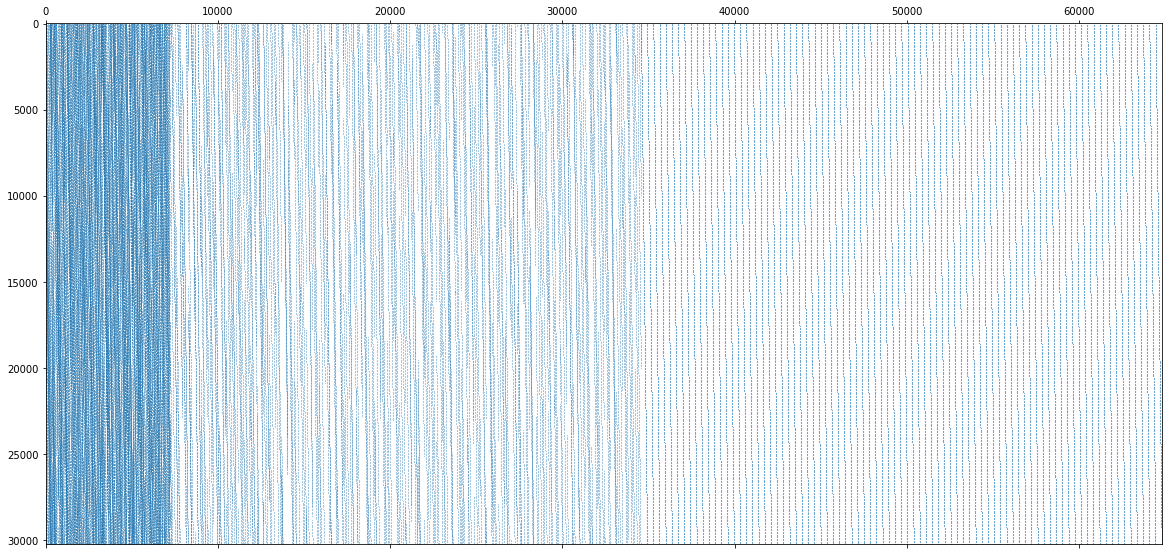

In [26]:
bil = get_parity_interleaver(K)
fig = plt.gcf();
fig.set_size_inches((20,10))
plt.spy(H[:,bil],markersize=.1)
plt.show()

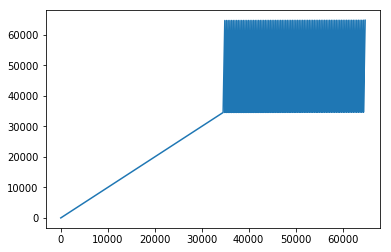

In [21]:
N=64800
plt.plot(bil)
plt.show()

In [ ]:
np.append(np.arange(10),np.arange(10))

In [9]:
print(bil)

[    0     1     2 ..., 64631 64715 64799]


In [27]:
%%timeit
I=H[:,bil]

4.68 ms ± 85 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
